In [1]:
import nilearn

In [2]:
from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']

In [3]:
import pandas

In [4]:
subj_idx = '01'
run = '02'

In [5]:
import os

In [6]:
import nibabel as nb
atlas_im = nb.load(atlas_filename)

In [7]:
path = os.path.join(os.environ['HOME'], 'data/openfmri/ds008/derivatives/fmriprep/sub-{subj_idx}/func/sub-{subj_idx}_task-stopsignal'.format(**locals()))

data = path + '_run-{}_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'.format(run)

confounds = path + '_run-{}_bold_confounds.tsv'.format(run)

confounds = pandas.read_csv(confounds, sep='\t', na_values='n/a').fillna(method='bfill')

from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_im, standardize=True, memory='nilearn_cache')

time_series = masker.fit_transform(data, confounds=confounds.values)

/Users/gilles/anaconda3/envs/py27/lib/python2.7/site-packages/nilearn/_utils/cache_mixin.py:291: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

(0, 100)

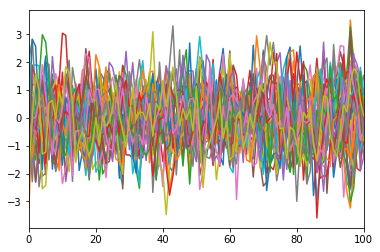

In [10]:
_ = plt.plot(time_series)
plt.xlim(0, 100)

In [11]:
# This code makes a connectivity matrix using a set of timeseries
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [12]:
def plot_correlation_matrix(correlation_matrix):
    # Display the correlation matrix
    import numpy as np
    from matplotlib import pyplot as plt
    plt.figure(figsize=(10, 10))
    # Mask out the major diagonal
    np.fill_diagonal(correlation_matrix, 0)
    plt.imshow(correlation_matrix, interpolation="nearest", cmap="RdBu_r",
               vmax=0.9, vmin=-0.9)
    plt.colorbar()
    # And display the labels
    x_ticks = plt.xticks(range(len(labels)), labels, rotation=90)
    y_ticks = plt.yticks(range(len(labels)), labels)

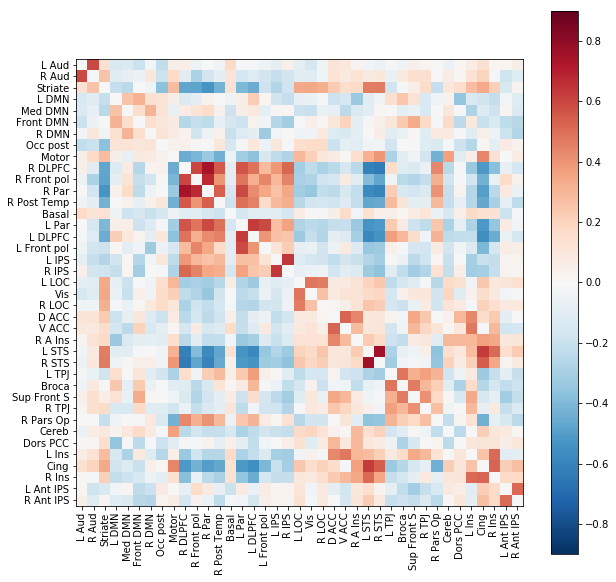

In [13]:
# Here we plot it
plot_correlation_matrix(correlation_matrix)

In [14]:
from nilearn import plotting
import numpy as np


In [15]:
coords_connectome = [plotting.find_xyz_cut_coords(img) for img in nilearn.image.iter_img(atlas_im)]

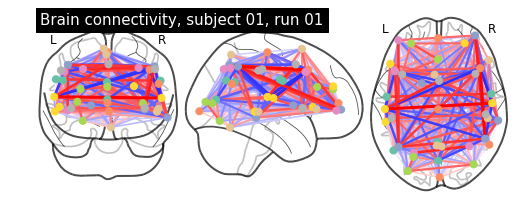

In [16]:
plotting.plot_connectome(correlation_matrix, coords_connectome, title='Brain connectivity, subject 01, run 01')

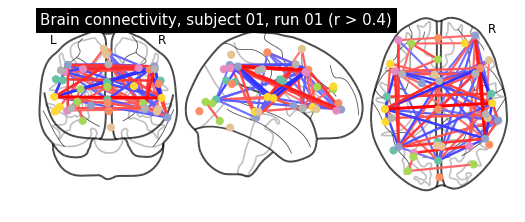

In [17]:
correlation_matrix = np.ma.masked_array(correlation_matrix, np.abs(correlation_matrix) < 0.4)
plotting.plot_connectome(correlation_matrix, coords_connectome, title='Brain connectivity, subject 01, run 01 (r > 0.4)')

In [18]:
import matplotlib.pyplot as plt

In [ ]:
subjects = ['%02d' % i for i in range(1, 16)]
subjects.pop(7)

'08'

In [ ]:
# Make a masker
masker = NiftiMapsMasker(maps_img=atlas_im, standardize=True, memory='nilearn_cache', memory_level=5)

# Make a list to fill up with correlation matrices
correlation_matrices = []


# Loop over 26 subjects
for subj_idx in subjects:
    
    print('Working on subject {}'.format(subj_idx))
    timeseries = []
    
    # loop over the 2 runs
    for run in ['01', '02']:
        
        # Make the path belonging to this subject and run
        path = os.path.join(os.environ['HOME'], 'data/openfmri/ds102/derivatives/fmriprep/sub-{subj_idx}/func/sub-{subj_idx}_task-flankertask'.format(**locals()))

        data = path + '_run-{}_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'.format(run)

        
        # Get the filenames that contain confounds
        confounds = path + '_run-{}_bold_confounds.tsv'.format(run)
        
        # Read the confounds in, replace the nans with nearest values
        confounds = pandas.read_csv(confounds, sep='\t', na_values='n/a').fillna(method='bfill')


        # Extract timeseries for every mask in the atlas
        ts = masker.fit_transform(data, confounds=confounds.values)
        timeseries.append(ts)
    
    
    # Create a correlation matrix for the two 
    correlation_measure = ConnectivityMeasure(kind='correlation')
    correlation_matrix = np.mean(correlation_measure.fit_transform(timeseries), 0)
    plot_correlation_matrix(correlation_matrix)
    plt.title('Subject {}'.format(subj_idx))
    
    correlation_matrices.append(correlation_matrix)

Working on subject 01
Working on subject 02


/Users/gilles/anaconda3/envs/py27/lib/python2.7/site-packages/nilearn/input_data/base_masker.py:98: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_maps_masker_extractor'
  memory_level=memory_level)(imgs)


Working on subject 03
Working on subject 04
Working on subject 05
Working on subject 06
Working on subject 07
Working on subject 09
Working on subject 10
Working on subject 11
Working on subject 12
Working on subject 13
Working on subject 14
Working on subject 15


In [ ]:
plot_correlation_matrix(np.mean(correlation_matrices, 0))

In [ ]:
correlation_matrix = np.ma.masked_array(np.mean(correlation_matrices, 0), np.abs(correlation_matrix) < 0.4)
plotting.plot_connectome(correlation_matrix, coords_connectome, title='Brain connectivity, subject 01, run 01 (r > 0.4)')

In [ ]:
import pandas
ssrts = pandas.read_csv('ssrts.csv')
ssrts.head()

In [ ]:
import scipy as sp
from scipy import stats

In [ ]:
def correlation_across_connectivity_matrics(y, X):
    n = X.shape[1]

    X = X.reshape((X.shape[0], -1))
    Xm = X.mean(0)
    ym = y.mean()

    r_num = ((X-Xm)*y[:, np.newaxis]).sum(0)
    r_den = np.sqrt(np.sum((X-Xm)**2,axis=0)*np.sum((y-ym)**2))
    
    r = r_num/r_den
    r = r.reshape((n, n))

    dof = X.shape[0] - 2

    t = (r * np.sqrt(dof)) / np.sqrt(1- r**2)

    p = 2 * sp.stats.t(dof).sf(t)
    
    return r, p

In [ ]:
np.array(ssrts['mean']).shape

In [ ]:
np.array(correlation_matrices).shape

In [ ]:
r, p = correlation_across_connectivity_matrics(np.array(ssrts['mean']), np.array(correlation_matrices))

In [ ]:
plot_correlation_matrix(r)

In [ ]:
plot_correlation_matrix(np.ma.masked_array(r, p > 0.005))

In [ ]:
plotting.plot_connectome(np.ma.masked_array(r, p > 0.005), coords_connectome, title='Correlation with SSRT', )

In [ ]:
labels

In [ ]:
nilearn.image.index_img(atlas_filename, labels.index('R DLPFC'))

In [ ]:
plotting.plot_roi(nilearn.image.index_img(atlas_filename, labels.index('R DLPFC')), threshold=0.0)
plotting.plot_roi(nilearn.image.index_img(atlas_filename, labels.index('R Ant IPS')), threshold=0.0)